# EDA and Cleaning of Diabetics Data

- First Step to load data frame
- Second Step to create Dictionary to converge into one dataset. This will make reading the inital dataset a little easier. 

In [84]:
# Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore 

# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)
import pandas_profiling

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(123)

In [59]:
# Load DF
df = pd.read_csv('diabetic_data.csv', na_values='?')

In [60]:
# Shape of dataframe
df.shape

(101766, 50)

In [61]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [62]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# Cleaning - Missingness

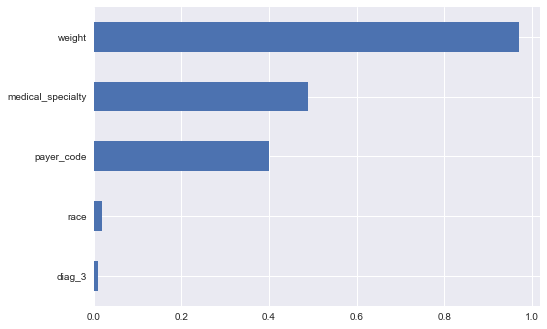

In [63]:
# Compute missingness 
missing = round((df.isna().sum()/len(df)),2).sort_values(ascending = True)
missing = missing[missing > 0]
missing.plot(kind='barh')

In [64]:
# Missing values table 
missing_table = pd.DataFrame(data=missing)
missing_table

,0
diag_3,0.01
race,0.02
payer_code,0.40
medical_specialty,0.49
weight,0.97


In [65]:
# Create target column
#Set all values <30 to YES (Readmission), else all other values to NO
df.readmitted = df.readmitted.apply(lambda x: 'Yes' if x in ['<30'] else 'No')

In [66]:
# Drop columns for missingness
df = df.drop(columns="weight")
df = df.drop(columns="payer_code")
df = df.drop(columns="medical_specialty")

In [67]:
# Dealing with Missingness
df = df.replace("?",np.NaN)
df.race = df.race.replace(np.NaN,"unknown")
df = df.replace(np.NaN, "missing")

In [68]:
df.isna().sum().sum()

0

# Cleaning - Delete Multiple Encounters

In [69]:
# Drop duplicate values for patient number. Keep first entry to show if patient was readmitted or not. 
df = df.drop_duplicates('patient_nbr', keep = 'first')
df = df.drop(columns="encounter_id")
df = df.drop(columns="patient_nbr")
df.shape

(71518, 45)

In [70]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,No
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No


# Cleaning - Feature Simplification

In [71]:
# Create a function to group diagnostic codes by range as well as separating diabetes specifically

def diag_grouper(series):
    
    '''takes input as df.col and outputs diagnostic code groupings'''
    
    def no_str(x):
        
        '''takes input as an element of a series and pulls code for diabetes specific disease and E/V categories'''
        
        if '250' in x: return '9999'
        elif 'E' in x: return '123456'
        elif 'V' in x: return '123456'
        elif x == 'missing': return '-654321'
        else: return x
    
    series = series.apply(no_str)
    
    series = series.astype(float)
    
    def num_categ(x):
        
        '''takes input as an element of a series and saves each range as a numerical placeholder'''
        
        if 1 <= x <= 139: return 10000
        elif 140 <= x <= 239: return 10001
        elif 240 <= x <= 279: return 10002
        elif 280 <= x <= 289: return 10003
        elif 290 <= x <= 319: return 10004
        elif 320 <= x <= 389: return 10005
        elif 390 <= x <= 459: return 10006
        elif 460 <= x <= 519: return 10007
        elif 520 <= x <= 579: return 10008
        elif 580 <= x <= 629: return 10009
        elif 630 <= x <= 679: return 10010
        elif 680 <= x <= 709: return 10011
        elif 710 <= x <= 739: return 10012
        elif 740 <= x <= 759: return 10013
        elif 760 <= x <= 779: return 10014
        elif 780 <= x <= 799: return 10015
        elif 800 <= x <= 999: return 10016
        else: return x
        
    series = series.apply(num_categ)
    
    def text_convert(x):
        
        '''takes input as an element of a series and converts each placeholder to string format'''
        
        if x == 10000: return "Infectious and Parasitic Disease"
        elif x == 10001: return "Neoplasms"
        elif x == 10002: return "Endocrine/Metabolic/Immunity Disorder"
        elif x == 10003: return "Blood/Blood Forming Organ Disease"
        elif x == 10004: return "Mental Disorder"
        elif x == 10005: return "Nervous System/Sense Organ Disease"
        elif x == 10006: return "Circulatory Disease"
        elif x == 10007: return "Respiratory Disease"
        elif x == 10008: return "Digestive Disease"
        elif x == 10009: return "Genitourinary Disease"
        elif x == 10010: return "Complications of Pregnancy/Childbirth/Puerperium"
        elif x == 10011: return "Skin Disease"
        elif x == 10012: return "Musculoskeletal/Connective Tissue Disease"
        elif x == 10013: return "Congenital Anomalies"
        elif x == 10014: return "Conditions of Perinatal Origin"
        elif x == 10015: return "Symptoms/Signs/Ill-Defined Conditions"
        elif x == 10016: return "Injury and Poisoning"
        elif x == 9999: return "Diabetes"
        elif x == 123456: return "External Injury/Supplemental"
        elif x == -654321: return "Missing"
    
    return series.apply(text_convert)

In [72]:
# Apply diag_grouper to the data frame
df.diag_1 = diag_grouper(df.diag_1)
df.diag_2 = diag_grouper(df.diag_2)
df.diag_3 = diag_grouper(df.diag_3)

# Perform an 80/20 Split for Hold Out Data

In [73]:
# Perform and 80/20 split of the data
train, test = train_test_split(df, test_size=0.2)

# Plots and Deeper EDA (Training Data Only)

In [ ]:
#train.profile_report() - caution greatly increases file size

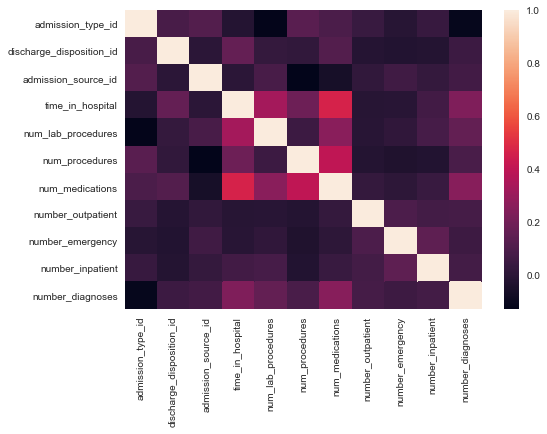

In [74]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = train.corr()
sns.heatmap(corr)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

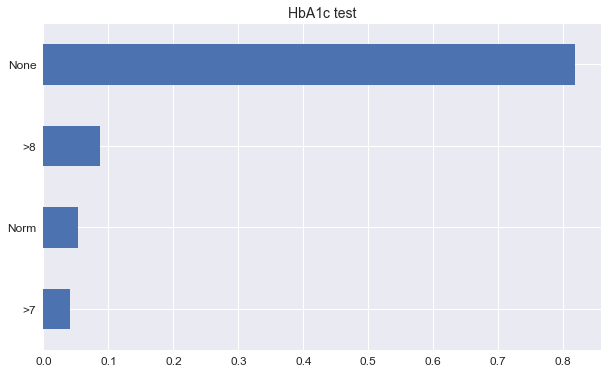

In [75]:
# HbA1c plot
plt.figure(figsize=(10,6))
a1cr_plot = train.A1Cresult.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

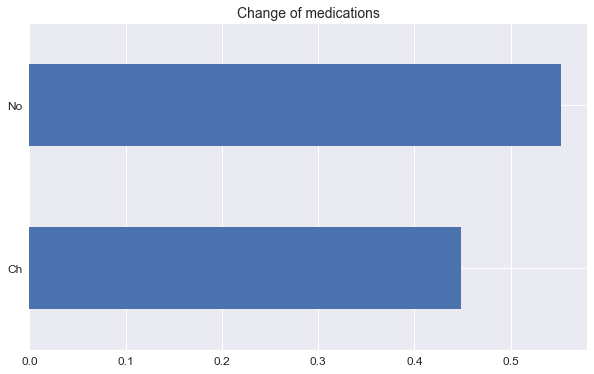

In [76]:
# Med change plot
plt.figure(figsize=(10,6))
change_plot = train.change.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

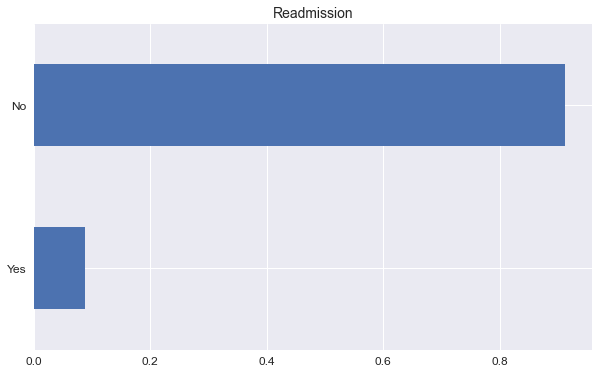

In [77]:
# Readmission plot
plt.figure(figsize=(10,6))
readmission_plot = train.readmitted.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [78]:
train['max_glu_serum'].replace('>300','>200',inplace=True)
train['A1Cresult'].replace('>8','>7',inplace=True)

In [79]:
#Readmission Table 1: Max Glucouse Serum
train[['max_glu_serum','readmitted']].groupby(['max_glu_serum','readmitted']).count()

Empty DataFrame
Columns: []
Index: [(>200, No), (>200, Yes), (None, No), (None, Yes), (Norm, No), (Norm, Yes)]

In [80]:
#Readmission Table 2: A1C Result 
train[['A1Cresult','readmitted']].groupby(['A1Cresult','readmitted']).count()

Empty DataFrame
Columns: []
Index: [(>7, No), (>7, Yes), (None, No), (None, Yes), (Norm, No), (Norm, Yes)]

In [81]:
#Readmission Table 3: Gender
train[['gender','readmitted']].groupby(['gender','readmitted']).count()

Empty DataFrame
Columns: []
Index: [(Female, No), (Female, Yes), (Male, No), (Male, Yes), (Unknown/Invalid, No)]

In [82]:
train[['gender','readmitted']].groupby(['gender','readmitted']).count()

Empty DataFrame
Columns: []
Index: [(Female, No), (Female, Yes), (Male, No), (Male, Yes), (Unknown/Invalid, No)]

# Outliers

In [85]:
# 3 rows have outliers
numeric = train.dtypes[train.dtypes != "object"].index
zscore_ = np.abs(zscore(train[numeric]))

row, col = np.where(zscore_>4)
dfz = pd.DataFrame({'row': row, 'col': col})
rows = dfz.groupby(['row']).count()
outliers = rows[rows.col>2].index
outliers

Int64Index([30097, 42715, 53792], dtype='int64', name='row')